In [8]:
import pandas as pd
df = pd.read_csv('s3://adl-core-sagemaker-studio/external/Hype/Hype_ML_demographics_2022_03_10_FinStress_AY.csv')

In [9]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df.shape

(58778, 51)

In [10]:
df.head()

,udp_global_id,client_id,age,gender,marital_status,is_union,primary_language_code,country_description,state,platform_indicator_code,mapped_employment_status_code,mapped_employment_status_description,mapped_fullpart_code,mapped_fullpart_description,mapped_high_compensation_code,mapped_high_compensation_description,mapped_permanent_temporary_code,mapped_permanent_temporary_description,mapped_hourly_salary_code,mapped_hourly_salary_description,subsidiary_code,subsidiary_description,mapped_flex_status_code,mapped_flex_status_description,original_hire_date,rehire_date,is_rehire,termination_date,base_pay_regular_payrate_amount,base_pay_regular_frequency_code,base_pay_regular_frequency_description,base_pay_regular_expectedannualsalary,base_pay_regular_expectedannualsalary_range,annual_benefits_base_rate,platform_id,person_internal_id,total_number_of_loans,total_number_of_withdrawal,hardship_reason_text_1,have_budget,financial_stress,platform_id.1,client_id.1,dc_ctrb,debt,emergency_savings,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure
0,59a0b691dab54b34a6ee69e5,9301,43.0,M,NaN,N,NaN,United States of America,IA,R4,ACTIVE,Active,FLTM,Full Time,NaN,NaN,PERM,Permanent,HRLY,Hourly,NaN,NaN,NaN,NaN,NaN,NaN,N,12/31/2299,29120.00,A1,Annual,29120.00,"$20,000-$39,999",NaN,9301,449200026,0,0,NaN,Always,Some,9301,9301,na,Debt to Income Ratio > 36%,4-6 months,41.333333,26.5,NaN,29120.00,16.623656
1,58fb9f8911a4b92f0c541daa,9301,51.0,M,NaN,N,NaN,United States of America,GA,R4,ACTIVE,Active,FLTM,Full Time,NaN,NaN,PERM,Permanent,SLRY,Salaried,NaN,NaN,NaN,NaN,NaN,NaN,N,12/31/2299,88165.68,A1,Annual,88165.68,"$80,000-$99,999",NaN,9301,406400044,0,0,NaN,Usually,None,9301,9301,na,Debt to Income Ratio < 36%,4-6 months,73.666667,26.5,NaN,88165.68,9.462366
2,59454d1b11a4b930dbc871b2,3889,27.0,F,NaN,N,NaN,United States of America,GA,R4,ACTIVE,Active,FLTM,Full Time,NaN,NaN,NaN,NaN,SLRY,Salaried,NaN,NaN,ELIGIBLE,Eligible,NaN,NaN,N,12/31/2299,39880.00,A1,Annual,39880.00,"$20,000-$39,999",NaN,3889,491710081,0,0,NaN,Sometimes,A little,3889,3889,na,Debt to Income Ratio < 36%,4-6 months,49.000000,NaN,NaN,39880.00,3.739247
3,5fa7bb5669b3125025d149fa,1656,41.0,Male,Single_United_States_of_America,N,NaN,United States of America,ME,R4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48800.00,Annual,NaN,49532.00,"$40,000-$59,999",48800.0,1656,226310064,0,0,NaN,Sometimes,Some,1656,1656,na,Debt to Income Ratio < 36%,1 month,30.000000,NaN,0.0,49532.00,0.365591
4,58fbc5a511a4b92f0c5c22fc,2378,28.0,M,S,N,NaN,United States of America,IN,R4,ACTIVE,Active,FLTM,Full Time,NaN,NaN,PERM,Permanent,SLRY,Salaried,NaN,NaN,ELIGIBLE,Eligible,NaN,10/15/2018,Y,12/31/2299,8067.38,M1,Monthly,96808.56,"$80,000-$99,999",NaN,2378,450470091,0,0,NaN,Always,A little,2378,2378,na,Debt to Income Ratio < 36%,4-6 months,59.500000,NaN,0.0,8750.00,3.368280


In [11]:
df.columns

Index(['udp_global_id', 'client_id', 'age', 'gender', 'marital_status',
       'is_union', 'primary_language_code', 'country_description', 'state',
       'platform_indicator_code', 'mapped_employment_status_code',
       'mapped_employment_status_description', 'mapped_fullpart_code',
       'mapped_fullpart_description', 'mapped_high_compensation_code',
       'mapped_high_compensation_description',
       'mapped_permanent_temporary_code',
       'mapped_permanent_temporary_description', 'mapped_hourly_salary_code',
       'mapped_hourly_salary_description', 'subsidiary_code',
       'subsidiary_description', 'mapped_flex_status_code',
       'mapped_flex_status_description', 'original_hire_date', 'rehire_date',
       'is_rehire', 'termination_date', 'base_pay_regular_payrate_amount',
       'base_pay_regular_frequency_code',
       'base_pay_regular_frequency_description',
       'base_pay_regular_expectedannualsalary',
       'base_pay_regular_expectedannualsalary_range',
       '

In [12]:
df['financial_stress'].head()

0        Some
1        None
2    A little
3        Some
4    A little
Name: financial_stress, dtype: object

In [13]:
df = df[['age', 'gender', 'marital_status','is_union','state','mapped_employment_status_code','mapped_hourly_salary_code',
        'subsidiary_code','mapped_flex_status_code','is_rehire','base_pay_regular_payrate_amount','base_pay_regular_expectedannualsalary',
        'annual_benefits_base_rate','total_number_of_loans', 'total_number_of_withdrawal','have_budget', 'dc_ctrb', 'debt', 
         'emergency_savings','employee_score', 'employer_score', 'is_employee_contributing_hsa',
       'salary', 'tenure','financial_stress']]

In [14]:
df.head()

,age,gender,marital_status,is_union,state,mapped_employment_status_code,mapped_hourly_salary_code,subsidiary_code,mapped_flex_status_code,is_rehire,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,annual_benefits_base_rate,total_number_of_loans,total_number_of_withdrawal,have_budget,dc_ctrb,debt,emergency_savings,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress
0,43.0,M,NaN,N,IA,ACTIVE,HRLY,NaN,NaN,N,29120.00,29120.00,NaN,0,0,Always,na,Debt to Income Ratio > 36%,4-6 months,41.333333,26.5,NaN,29120.00,16.623656,Some
1,51.0,M,NaN,N,GA,ACTIVE,SLRY,NaN,NaN,N,88165.68,88165.68,NaN,0,0,Usually,na,Debt to Income Ratio < 36%,4-6 months,73.666667,26.5,NaN,88165.68,9.462366,None
2,27.0,F,NaN,N,GA,ACTIVE,SLRY,NaN,ELIGIBLE,N,39880.00,39880.00,NaN,0,0,Sometimes,na,Debt to Income Ratio < 36%,4-6 months,49.000000,NaN,NaN,39880.00,3.739247,A little
3,41.0,Male,Single_United_States_of_America,N,ME,NaN,NaN,NaN,NaN,NaN,48800.00,49532.00,48800.0,0,0,Sometimes,na,Debt to Income Ratio < 36%,1 month,30.000000,NaN,0.0,49532.00,0.365591,Some
4,28.0,M,S,N,IN,ACTIVE,SLRY,NaN,ELIGIBLE,Y,8067.38,96808.56,NaN,0,0,Always,na,Debt to Income Ratio < 36%,4-6 months,59.500000,NaN,0.0,8750.00,3.368280,A little


In [15]:
df.isnull().sum()/len(df)

age                                      0.000204
gender                                   0.000187
marital_status                           0.256184
is_union                                 0.000000
state                                    0.057624
mapped_employment_status_code            0.218942
mapped_hourly_salary_code                0.574569
subsidiary_code                          0.960376
mapped_flex_status_code                  0.572986
is_rehire                                0.216918
base_pay_regular_payrate_amount          0.072459
base_pay_regular_expectedannualsalary    0.062608
annual_benefits_base_rate                0.694426
total_number_of_loans                    0.000000
total_number_of_withdrawal               0.000000
have_budget                              0.000000
dc_ctrb                                  0.000000
debt                                     0.000000
emergency_savings                        0.000000
employee_score                           0.000000


In [16]:
df['is_employee_contributing_hsa'].value_counts()

0.0    16186
1.0     8150
Name: is_employee_contributing_hsa, dtype: int64

In [17]:
df = df.drop(columns=['subsidiary_code','annual_benefits_base_rate'],axis=1)

In [18]:
df.isnull().sum()

age                                         12
gender                                      11
marital_status                           15058
is_union                                     0
state                                     3387
mapped_employment_status_code            12869
mapped_hourly_salary_code                33772
mapped_flex_status_code                  33679
is_rehire                                12750
base_pay_regular_payrate_amount           4259
base_pay_regular_expectedannualsalary     3680
total_number_of_loans                        0
total_number_of_withdrawal                   0
have_budget                                  0
dc_ctrb                                      0
debt                                         0
emergency_savings                            0
employee_score                               0
employer_score                           29865
is_employee_contributing_hsa             34442
salary                                    3327
tenure       

In [19]:
df = df.apply(lambda x : x.fillna(x.value_counts().index[0]))

In [20]:
df.isnull().sum()

age                                      0
gender                                   0
marital_status                           0
is_union                                 0
state                                    0
mapped_employment_status_code            0
mapped_hourly_salary_code                0
mapped_flex_status_code                  0
is_rehire                                0
base_pay_regular_payrate_amount          0
base_pay_regular_expectedannualsalary    0
total_number_of_loans                    0
total_number_of_withdrawal               0
have_budget                              0
dc_ctrb                                  0
debt                                     0
emergency_savings                        0
employee_score                           0
employer_score                           0
is_employee_contributing_hsa             0
salary                                   0
tenure                                   0
financial_stress                         0
dtype: int6

In [21]:
df.head()

,age,gender,marital_status,is_union,state,mapped_employment_status_code,mapped_hourly_salary_code,mapped_flex_status_code,is_rehire,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,have_budget,dc_ctrb,debt,emergency_savings,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress
0,43.0,M,M,N,IA,ACTIVE,HRLY,ELIGIBLE,N,29120.00,29120.00,0,0,Always,na,Debt to Income Ratio > 36%,4-6 months,41.333333,26.5,0.0,29120.00,16.623656,Some
1,51.0,M,M,N,GA,ACTIVE,SLRY,ELIGIBLE,N,88165.68,88165.68,0,0,Usually,na,Debt to Income Ratio < 36%,4-6 months,73.666667,26.5,0.0,88165.68,9.462366,None
2,27.0,F,M,N,GA,ACTIVE,SLRY,ELIGIBLE,N,39880.00,39880.00,0,0,Sometimes,na,Debt to Income Ratio < 36%,4-6 months,49.000000,26.5,0.0,39880.00,3.739247,A little
3,41.0,Male,Single_United_States_of_America,N,ME,ACTIVE,SLRY,ELIGIBLE,Y,48800.00,49532.00,0,0,Sometimes,na,Debt to Income Ratio < 36%,1 month,30.000000,26.5,0.0,49532.00,0.365591,Some
4,28.0,M,S,N,IN,ACTIVE,SLRY,ELIGIBLE,Y,8067.38,96808.56,0,0,Always,na,Debt to Income Ratio < 36%,4-6 months,59.500000,26.5,0.0,8750.00,3.368280,A little


In [22]:
df['marital_status'].value_counts()

M                                                  38323
S                                                  17768
Married_United_States_of_America                    1426
Single_United_States_of_America                      778
Not_Indicated_United_States_of_America               131
Divorced_United_States_of_America                    131
Unknown_United_States_of_America                      72
Widowed_United_States_of_America                      25
Single                                                23
Co-Habiting_United_States_of_America                  20
Not_Disclosed_United_States_of_America                17
Married                                               14
Partnered_United_States_of_America                    10
Separated_United_States_of_America                    10
Common_Law_United_States_of_America                    8
USA_Single                                             5
Single_USA                                             3
Married_Canada                 

In [23]:
final_df = df

In [24]:
final_df['marital_status'].replace(to_replace={'S','Single_United_States_of_America','S-USA','Single','Single_USA','USA-Single','Single USA',
                                               'USA-Single','Single_United_Kingdom','S-KOR'},
                                    value=1,inplace=True,regex=True)

In [25]:
final_df['marital_status'].replace(to_replace={'M','Married_United_States_of_America','M-USA','Married','Married_USA','USA_Married',
                                               'Married USA','USA-Married','Married USA','USA-Married','M-IND','M-GBR','M-CAN','M-HKG',
                                               'Married_Singapore','M-SGP','Married_Canada','Married_Australia','Married_Ireland','Married_Spain'},
                                    value=2,inplace=True,regex=True)

In [26]:
final_df['marital_status'].replace(to_replace={'Divorced_United_States_of_America','D-USA','Widowed_United_States_of_America','DE_FACTO',
                                               'O-USA','Separated_United_States_of_America','Divorced','R-USA','USA_Divorced','C-USA',
                                               'Divorced_USA','Divorced USA','Widowed_USA','Divorced_Philippines','MARITAL_STATUS-6-322'},
                                    value=3,inplace=True,regex=True)

In [27]:
final_df['marital_status'].replace(to_replace={'Co-Habiting_United_States_of_America','P-USA','Civil_Partnership_United_States_of_America',
                                               'Registered_Partnership_United_States_of_America','Domestic_Partner_United_States_of_America',
                                               'RDP','Domestic Partner','Partnered USA','Partnered_United_States_of_America','P-GBR','USA_Living together'},
                                    value=4,inplace=True,regex=True)

In [28]:
import numpy as np
final_df['marital_status'].replace(to_replace={'Unknown_United_States_of_America','U-USA','Not_Indicated_United_States_of_America',
                                               'CU','L-USA','Not_Disclosed_United_Kingdom','Unknown_USA','None',np.nan},
                                    value=5,inplace=True,regex=True)

In [29]:
final_df['marital_status'].value_counts()

2    38339
1    20437
3        2
Name: marital_status, dtype: int64

In [30]:
final_df.head()

,age,gender,marital_status,is_union,state,mapped_employment_status_code,mapped_hourly_salary_code,mapped_flex_status_code,is_rehire,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,have_budget,dc_ctrb,debt,emergency_savings,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress
0,43.0,M,2,N,IA,ACTIVE,HRLY,ELIGIBLE,N,29120.00,29120.00,0,0,Always,na,Debt to Income Ratio > 36%,4-6 months,41.333333,26.5,0.0,29120.00,16.623656,Some
1,51.0,M,2,N,GA,ACTIVE,SLRY,ELIGIBLE,N,88165.68,88165.68,0,0,Usually,na,Debt to Income Ratio < 36%,4-6 months,73.666667,26.5,0.0,88165.68,9.462366,None
2,27.0,F,2,N,GA,ACTIVE,SLRY,ELIGIBLE,N,39880.00,39880.00,0,0,Sometimes,na,Debt to Income Ratio < 36%,4-6 months,49.000000,26.5,0.0,39880.00,3.739247,A little
3,41.0,Male,1,N,ME,ACTIVE,SLRY,ELIGIBLE,Y,48800.00,49532.00,0,0,Sometimes,na,Debt to Income Ratio < 36%,1 month,30.000000,26.5,0.0,49532.00,0.365591,Some
4,28.0,M,1,N,IN,ACTIVE,SLRY,ELIGIBLE,Y,8067.38,96808.56,0,0,Always,na,Debt to Income Ratio < 36%,4-6 months,59.500000,26.5,0.0,8750.00,3.368280,A little


In [31]:
def financial_stress(x):
    if x.financial_stress == 'Some' or x.financial_stress == 'A little' or  x.financial_stress == 'A lot':
        return 1
    return 0

In [32]:
df['financial_stress_mapped'] = df.apply(financial_stress,axis=1)

In [33]:
df['financial_stress_mapped'].value_counts()

1    48624
0    10154
Name: financial_stress_mapped, dtype: int64

In [34]:
final_df.corr()

,age,marital_status,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress_mapped
age,1.000000,0.198347,0.103285,0.109863,-0.025540,0.080736,0.192278,0.005130,-0.013197,0.118945,0.481298,-0.097613
marital_status,0.198347,1.000000,0.132593,0.132139,-0.044858,-0.027525,0.125699,-0.091450,0.032399,0.138280,0.132472,-0.045560
base_pay_regular_payrate_amount,0.103285,0.132593,1.000000,0.985495,-0.088783,-0.043213,0.315732,-0.043438,0.064834,0.966850,0.112631,-0.110154
base_pay_regular_expectedannualsalary,0.109863,0.132139,0.985495,1.000000,-0.094430,-0.043162,0.320614,-0.050259,0.065762,0.957996,0.118373,-0.113171
total_number_of_loans,-0.025540,-0.044858,-0.088783,-0.094430,1.000000,0.023805,-0.192053,0.018559,0.009207,-0.092069,-0.020346,0.063743
total_number_of_withdrawal,0.080736,-0.027525,-0.043213,-0.043162,0.023805,1.000000,-0.069486,0.007185,-0.002848,-0.041965,0.043635,0.011930
employee_score,0.192278,0.125699,0.315732,0.320614,-0.192053,-0.069486,1.000000,0.119283,0.348233,0.328093,0.189910,-0.343354
employer_score,0.005130,-0.091450,-0.043438,-0.050259,0.018559,0.007185,0.119283,1.000000,0.301388,-0.035174,0.012253,-0.015916
is_employee_contributing_hsa,-0.013197,0.032399,0.064834,0.065762,0.009207,-0.002848,0.348233,0.301388,1.000000,0.070780,0.016338,-0.030352
salary,0.118945,0.138280,0.966850,0.957996,-0.092069,-0.041965,0.328093,-0.035174,0.070780,1.000000,0.124457,-0.113544


In [35]:
final_df['gender'].value_counts()

M                    29444
F                    25278
Female                2297
Male                  1542
female                 105
male                    85
U                       11
Unknown                  8
N                        3
O                        2
Decline to answer        2
Not declared             1
Name: gender, dtype: int64

In [36]:
final_df['gender'].replace(to_replace={'Male','male'},value='M',inplace=True,regex=True)
final_df['gender'].replace(to_replace={'Female','female'},value='F',inplace=True,regex=True)
final_df['gender'].replace(to_replace={'U','Unknown','N','O','Decline to answer','Not declared'},value='U',inplace=True,regex=True)

In [37]:
final_df['gender'].value_counts()

M               31071
F               25278
FeM              2297
feM               105
U                  26
Uot declared        1
Name: gender, dtype: int64

In [38]:
final_df['gender'].replace(to_replace={'FeM','feM'},value='F',inplace=True,regex=True)

In [39]:
final_df['gender'].value_counts()

M               31071
F               27680
U                  26
Uot declared        1
Name: gender, dtype: int64

In [40]:
final_df = final_df.drop('financial_stress',axis=1)

In [41]:
final_df.head()

,age,gender,marital_status,is_union,state,mapped_employment_status_code,mapped_hourly_salary_code,mapped_flex_status_code,is_rehire,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,have_budget,dc_ctrb,debt,emergency_savings,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress_mapped
0,43.0,M,2,N,IA,ACTIVE,HRLY,ELIGIBLE,N,29120.00,29120.00,0,0,Always,na,Debt to Income Ratio > 36%,4-6 months,41.333333,26.5,0.0,29120.00,16.623656,1
1,51.0,M,2,N,GA,ACTIVE,SLRY,ELIGIBLE,N,88165.68,88165.68,0,0,Usually,na,Debt to Income Ratio < 36%,4-6 months,73.666667,26.5,0.0,88165.68,9.462366,0
2,27.0,F,2,N,GA,ACTIVE,SLRY,ELIGIBLE,N,39880.00,39880.00,0,0,Sometimes,na,Debt to Income Ratio < 36%,4-6 months,49.000000,26.5,0.0,39880.00,3.739247,1
3,41.0,M,1,N,ME,ACTIVE,SLRY,ELIGIBLE,Y,48800.00,49532.00,0,0,Sometimes,na,Debt to Income Ratio < 36%,1 month,30.000000,26.5,0.0,49532.00,0.365591,1
4,28.0,M,1,N,IN,ACTIVE,SLRY,ELIGIBLE,Y,8067.38,96808.56,0,0,Always,na,Debt to Income Ratio < 36%,4-6 months,59.500000,26.5,0.0,8750.00,3.368280,1


In [42]:
final_df['mapped_flex_status_code'].unique()

array(['ELIGIBLE', 'NOTELIGIBLE', 'ACTIVE', 'DNM', 'INACTIVE', 'NGACT',
       'TSDACT', 'HIITSD'], dtype=object)

In [43]:
final_df['mapped_hourly_salary_code'].unique()

array(['HRLY', 'SLRY', 'S', 'H'], dtype=object)

In [44]:
final_df = final_df.drop('state',axis=1)

In [45]:
final_df = final_df.drop('mapped_hourly_salary_code',axis=1)

In [46]:
final_df = final_df.drop('dc_ctrb',axis=1)

In [50]:
import category_encoders as ce

In [51]:
encoder = ce.sum_coding.SumEncoder(cols=['gender','is_union','mapped_employment_status_code','mapped_flex_status_code',
                                         'is_rehire','have_budget','debt','emergency_savings'])

In [52]:
final_df = encoder.fit_transform(final_df)

In [53]:
final_df.shape

(58778, 56)

In [54]:
final_df.head()

,intercept,age,gender_0,gender_1,gender_2,marital_status,is_union_0,mapped_employment_status_code_0,mapped_employment_status_code_1,mapped_employment_status_code_2,mapped_employment_status_code_3,mapped_employment_status_code_4,mapped_employment_status_code_5,mapped_employment_status_code_6,mapped_employment_status_code_7,mapped_employment_status_code_8,mapped_employment_status_code_9,mapped_employment_status_code_10,mapped_employment_status_code_11,mapped_employment_status_code_12,mapped_employment_status_code_13,mapped_employment_status_code_14,mapped_employment_status_code_15,mapped_employment_status_code_16,mapped_employment_status_code_17,mapped_employment_status_code_18,mapped_employment_status_code_19,mapped_employment_status_code_20,mapped_employment_status_code_21,mapped_employment_status_code_22,mapped_employment_status_code_23,mapped_flex_status_code_0,mapped_flex_status_code_1,mapped_flex_status_code_2,mapped_flex_status_code_3,mapped_flex_status_code_4,mapped_flex_status_code_5,mapped_flex_status_code_6,is_rehire_0,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,have_budget_0,have_budget_1,have_budget_2,debt_0,emergency_savings_0,emergency_savings_1,emergency_savings_2,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress_mapped
0,1,43.0,1.0,0.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29120.00,29120.00,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,41.333333,26.5,0.0,29120.00,16.623656,1
1,1,51.0,1.0,0.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88165.68,88165.68,0,0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,73.666667,26.5,0.0,88165.68,9.462366,0
2,1,27.0,0.0,1.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39880.00,39880.00,0,0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,49.000000,26.5,0.0,39880.00,3.739247,1
3,1,41.0,1.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,48800.00,49532.00,0,0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,30.000000,26.5,0.0,49532.00,0.365591,1
4,1,28.0,1.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,8067.38,96808.56,0,0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,59.500000,26.5,0.0,8750.00,3.368280,1


In [55]:
final_df['financial_stress_mapped'].value_counts()

1    48624
0    10154
Name: financial_stress_mapped, dtype: int64

In [56]:
final_df = final_df.drop('intercept',axis=1)

# Random Forest

In [57]:
X = final_df.drop('financial_stress_mapped',axis=1)
y = final_df['financial_stress_mapped']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators = 200, max_features = 'auto', min_samples_split = 10)

In [61]:
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=200)

In [62]:
rfc_pred = rfc.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.62      0.17      0.27      3046
           1       0.85      0.98      0.91     14588

    accuracy                           0.84     17634
   macro avg       0.74      0.58      0.59     17634
weighted avg       0.81      0.84      0.80     17634



# Tensorflow

In [6]:
import tensorflow as tf

# Initializing ANN

In [7]:
ann = tf.keras.models.Sequential()

In [64]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [65]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [66]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [67]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [68]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
1286/1286 [==============================] - 2s 1ms/step - loss: 509.5770 - accuracy: 0.6791
Epoch 2/50
1286/1286 [==============================] - 2s 1ms/step - loss: 56.2856 - accuracy: 0.7117
Epoch 3/50
1286/1286 [==============================] - 1s 1ms/step - loss: 47.1540 - accuracy: 0.7069
Epoch 4/50
1286/1286 [==============================] - 1s 1ms/step - loss: 26.7179 - accuracy: 0.7027
Epoch 5/50
1286/1286 [==============================] - 1s 1ms/step - loss: 17.1074 - accuracy: 0.7104
Epoch 6/50
1286/1286 [==============================] - 1s 1ms/step - loss: 10.1781 - accuracy: 0.7088
Epoch 7/50
1286/1286 [==============================] - 1s 1ms/step - loss: 6.0293 - accuracy: 0.7144
Epoch 8/50
1286/1286 [==============================] - 1s 1ms/step - loss: 3.5134 - accuracy: 0.7426
Epoch 9/50
1286/1286 [==============================] - 1s 1ms/step - loss: 3.0560 - accuracy: 0.7394
Epoch 10/50
1286/1286 [==============================] - 2s 1ms/step - loss

In [69]:
ann.evaluate(X_train,y_train,verbose=0)

[0.4600358009338379, 0.8273381590843201]

In [70]:
ann.evaluate(X_test,y_test,verbose=0)

[0.4601500332355499, 0.8272655010223389]

In [71]:
y_pred = ann.predict_classes(X_test,verbose=0)

/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.827266
Precision: 0.827266
Recall: 1.000000
F1 score: 0.905468


In [74]:
roc_auc_score(y_test, y_pred)

0.5

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3046
           1       0.83      1.00      0.91     14588

    accuracy                           0.83     17634
   macro avg       0.41      0.50      0.45     17634
weighted avg       0.68      0.83      0.75     17634



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# rmsprop optimizer

In [116]:
ann = tf.keras.models.Sequential()

In [117]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [118]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [119]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [120]:
ann.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])

In [121]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
1286/1286 [==============================] - 2s 1ms/step - loss: 192.9456 - accuracy: 0.6796
Epoch 2/50
1286/1286 [==============================] - 1s 1ms/step - loss: 81.7974 - accuracy: 0.6895
Epoch 3/50
1286/1286 [==============================] - 1s 973us/step - loss: 39.6252 - accuracy: 0.6890
Epoch 4/50
1286/1286 [==============================] - 2s 1ms/step - loss: 20.1661 - accuracy: 0.6916
Epoch 5/50
1286/1286 [==============================] - 1s 996us/step - loss: 2.7076 - accuracy: 0.8052
Epoch 6/50
1286/1286 [==============================] - 1s 1ms/step - loss: 1.6333 - accuracy: 0.8222
Epoch 7/50
1286/1286 [==============================] - 1s 987us/step - loss: 1.2815 - accuracy: 0.8237
Epoch 8/50
1286/1286 [==============================] - 1s 988us/step - loss: 0.8428 - accuracy: 0.8215
Epoch 9/50
1286/1286 [==============================] - 1s 1ms/step - loss: 0.6502 - accuracy: 0.8259
Epoch 10/50
1286/1286 [==============================] - 1s 998us/ste

In [122]:
ann.evaluate(X_train,y_train,verbose=0)

[0.4628702998161316, 0.827216625213623]

In [123]:
ann.evaluate(X_test,y_test,verbose=0)

[0.4635659158229828, 0.8272655010223389]

In [124]:
y_pred = ann.predict_classes(X_test,verbose=0)

/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [125]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.827266
Precision: 0.827266
Recall: 1.000000
F1 score: 0.905468


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3046
           1       0.83      1.00      0.91     14588

    accuracy                           0.83     17634
   macro avg       0.41      0.50      0.45     17634
weighted avg       0.68      0.83      0.75     17634



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adadelta optimizer

In [104]:
ann = tf.keras.models.Sequential()

In [105]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [106]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [107]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [108]:
ann.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=['accuracy'])

In [109]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
1286/1286 [==============================] - 2s 951us/step - loss: 2862.5688 - accuracy: 0.8273
Epoch 2/50
1286/1286 [==============================] - 1s 947us/step - loss: 2292.0357 - accuracy: 0.8251
Epoch 3/50
1286/1286 [==============================] - 1s 959us/step - loss: 1607.0983 - accuracy: 0.8272
Epoch 4/50
1286/1286 [==============================] - 1s 959us/step - loss: 988.6731 - accuracy: 0.8257
Epoch 5/50
1286/1286 [==============================] - 1s 976us/step - loss: 384.5845 - accuracy: 0.8069
Epoch 6/50
1286/1286 [==============================] - 1s 956us/step - loss: 179.4783 - accuracy: 0.6962
Epoch 7/50
1286/1286 [==============================] - 1s 984us/step - loss: 156.0382 - accuracy: 0.6981
Epoch 8/50
1286/1286 [==============================] - 1s 982us/step - loss: 177.5182 - accuracy: 0.6992
Epoch 9/50
1286/1286 [==============================] - 1s 969us/step - loss: 148.3268 - accuracy: 0.6983
Epoch 10/50
1286/1286 [====================

In [110]:
ann.evaluate(X_train,y_train,verbose=0)

[94.13825988769531, 0.7358788847923279]

In [111]:
ann.evaluate(X_test,y_test,verbose=0)

[87.12142181396484, 0.7353975176811218]

In [112]:
y_pred = ann.predict_classes(X_test,verbose=0)

/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [113]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.735398
Precision: 0.818994
Recall: 0.873115
F1 score: 0.845189


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.08      0.09      3046
           1       0.82      0.87      0.85     14588

    accuracy                           0.74     17634
   macro avg       0.46      0.47      0.47     17634
weighted avg       0.70      0.74      0.71     17634



# Adagrad

In [91]:
ann = tf.keras.models.Sequential()

In [92]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [93]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [94]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [95]:
ann.compile(optimizer="adagrad",loss="binary_crossentropy",metrics=['accuracy'])

In [96]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
1286/1286 [==============================] - 2s 945us/step - loss: 852.2472 - accuracy: 0.7542
Epoch 2/50
1286/1286 [==============================] - 1s 963us/step - loss: 45.0966 - accuracy: 0.6835
Epoch 3/50
1286/1286 [==============================] - 1s 986us/step - loss: 28.4574 - accuracy: 0.6747
Epoch 4/50
1286/1286 [==============================] - 1s 951us/step - loss: 18.1414 - accuracy: 0.6635
Epoch 5/50
1286/1286 [==============================] - 1s 949us/step - loss: 17.1782 - accuracy: 0.6787
Epoch 6/50
1286/1286 [==============================] - 1s 955us/step - loss: 14.0946 - accuracy: 0.6830
Epoch 7/50
1286/1286 [==============================] - 1s 948us/step - loss: 15.1120 - accuracy: 0.6906
Epoch 8/50
1286/1286 [==============================] - 1s 985us/step - loss: 10.8609 - accuracy: 0.6978
Epoch 9/50
1286/1286 [==============================] - 1s 975us/step - loss: 9.7228 - accuracy: 0.6968
Epoch 10/50
1286/1286 [==============================] 

In [97]:
ann.evaluate(X_train,y_train,verbose=0)

[5.731231212615967, 0.8093768358230591]

In [98]:
ann.evaluate(X_test,y_test,verbose=0)

[4.275550365447998, 0.8119542002677917]

In [99]:
y_pred = ann.predict_classes(X_test,verbose=0)

/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [100]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [101]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.811954
Precision: 0.828056
Recall: 0.975185
F1 score: 0.895618


In [102]:
roc_auc_score(y_test, y_pred)

0.5026943146319995

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.20      0.03      0.05      3046
           1       0.83      0.98      0.90     14588

    accuracy                           0.81     17634
   macro avg       0.52      0.50      0.47     17634
weighted avg       0.72      0.81      0.75     17634



# Sampling Technique

In [133]:
final_df.head()

,age,gender_0,gender_1,gender_2,marital_status,is_union_0,mapped_employment_status_code_0,mapped_employment_status_code_1,mapped_employment_status_code_2,mapped_employment_status_code_3,mapped_employment_status_code_4,mapped_employment_status_code_5,mapped_employment_status_code_6,mapped_employment_status_code_7,mapped_employment_status_code_8,mapped_employment_status_code_9,mapped_employment_status_code_10,mapped_employment_status_code_11,mapped_employment_status_code_12,mapped_employment_status_code_13,mapped_employment_status_code_14,mapped_employment_status_code_15,mapped_employment_status_code_16,mapped_employment_status_code_17,mapped_employment_status_code_18,mapped_employment_status_code_19,mapped_employment_status_code_20,mapped_employment_status_code_21,mapped_employment_status_code_22,mapped_employment_status_code_23,mapped_flex_status_code_0,mapped_flex_status_code_1,mapped_flex_status_code_2,mapped_flex_status_code_3,mapped_flex_status_code_4,mapped_flex_status_code_5,mapped_flex_status_code_6,is_rehire_0,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,have_budget_0,have_budget_1,have_budget_2,debt_0,emergency_savings_0,emergency_savings_1,emergency_savings_2,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress_mapped
0,43.0,1.0,0.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29120.00,29120.00,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,41.333333,26.5,0.0,29120.00,16.623656,1
1,51.0,1.0,0.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88165.68,88165.68,0,0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0,73.666667,26.5,0.0,88165.68,9.462366,0
2,27.0,0.0,1.0,0.0,2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39880.00,39880.00,0,0,0.0,0.0,1.0,-1.0,1.0,0.0,0.0,49.000000,26.5,0.0,39880.00,3.739247,1
3,41.0,1.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,48800.00,49532.00,0,0,0.0,0.0,1.0,-1.0,0.0,1.0,0.0,30.000000,26.5,0.0,49532.00,0.365591,1
4,28.0,1.0,0.0,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,8067.38,96808.56,0,0,1.0,0.0,0.0,-1.0,1.0,0.0,0.0,59.500000,26.5,0.0,8750.00,3.368280,1


In [136]:
final_df.corr()

,age,gender_0,gender_1,gender_2,marital_status,is_union_0,mapped_employment_status_code_0,mapped_employment_status_code_1,mapped_employment_status_code_2,mapped_employment_status_code_3,mapped_employment_status_code_4,mapped_employment_status_code_5,mapped_employment_status_code_6,mapped_employment_status_code_7,mapped_employment_status_code_8,mapped_employment_status_code_9,mapped_employment_status_code_10,mapped_employment_status_code_11,mapped_employment_status_code_12,mapped_employment_status_code_13,mapped_employment_status_code_14,mapped_employment_status_code_15,mapped_employment_status_code_16,mapped_employment_status_code_17,mapped_employment_status_code_18,mapped_employment_status_code_19,mapped_employment_status_code_20,mapped_employment_status_code_21,mapped_employment_status_code_22,mapped_employment_status_code_23,mapped_flex_status_code_0,mapped_flex_status_code_1,mapped_flex_status_code_2,mapped_flex_status_code_3,mapped_flex_status_code_4,mapped_flex_status_code_5,mapped_flex_status_code_6,is_rehire_0,base_pay_regular_payrate_amount,base_pay_regular_expectedannualsalary,total_number_of_loans,total_number_of_withdrawal,have_budget_0,have_budget_1,have_budget_2,debt_0,emergency_savings_0,emergency_savings_1,emergency_savings_2,employee_score,employer_score,is_employee_contributing_hsa,salary,tenure,financial_stress_mapped
age,1.000000,3.202354e-02,-3.117695e-02,-1.802436e-02,1.983471e-01,5.841628e-03,-2.415430e-02,2.071070e-02,-1.934728e-02,3.014376e-02,-5.059351e-03,1.425532e-02,2.345250e-02,-5.076136e-04,5.214191e-02,-4.245874e-03,1.804969e-02,-9.472180e-03,2.588443e-03,5.268233e-03,6.911033e-03,-1.207640e-02,9.540748e-03,9.628880e-03,1.171380e-02,2.073045e-02,9.816905e-03,4.263174e-03,3.535865e-03,1.153486e-02,3.477642e-03,-1.444018e-03,-2.775316e-03,-4.107302e-03,5.519637e-03,3.681339e-03,4.908453e-04,9.914986e-02,0.103285,0.109863,-2.554028e-02,8.073584e-02,2.999131e-02,2.267282e-02,-5.172415e-02,-4.221043e-02,1.345386e-01,3.500506e-02,4.563729e-02,0.192278,5.129704e-03,-1.319678e-02,0.118945,0.481298,-9.761325e-02
gender_0,0.032024,1.000000e+00,-9.988058e-01,-1.942678e-02,1.478907e-01,1.450351e-02,2.623439e-02,-1.635798e-02,2.568210e-04,6.929721e-03,-2.338604e-02,-5.870113e-03,-1.216231e-03,-1.662200e-02,8.947476e-03,-5.194216e-03,-3.684752e-03,-2.234871e-02,-5.257442e-03,-6.343880e-03,2.248721e-03,5.370298e-03,-2.362986e-04,2.987295e-03,8.920720e-03,1.118392e-02,-1.959905e-18,5.225620e-03,-7.132228e-03,-2.154288e-20,1.173695e-02,-1.534483e-02,-4.935458e-03,-3.619521e-03,-3.759054e-03,-4.228106e-18,1.199929e-17,7.633732e-02,0.179790,0.186790,-2.212357e-02,-1.498257e-02,7.139611e-02,5.997591e-02,-1.962881e-02,-1.551790e-01,2.006133e-01,8.991776e-02,1.177113e-01,0.233916,3.854967e-02,9.791533e-02,0.186336,0.031514,-7.731344e-02
gender_1,-0.031177,-9.988058e-01,1.000000e+00,-1.713393e-02,-1.473326e-01,-1.454452e-02,-2.612218e-02,1.604033e-02,-1.719868e-04,-6.895251e-03,2.343114e-02,5.885281e-03,1.266131e-03,1.664972e-02,-8.914835e-03,5.236729e-03,3.701868e-03,2.240492e-02,5.294919e-03,6.352891e-03,-2.246495e-03,-5.356334e-03,2.403889e-04,-2.980808e-03,-8.915760e-03,-1.117591e-02,2.207063e-17,-5.220449e-03,7.139293e-03,3.699858e-17,-1.113271e-02,1.541334e-02,4.184259e-03,3.637582e-03,3.765926e-03,-1.609868e-18,3.247730e-19,-7.681785e-02,-0.179411,-0.186396,2.213819e-02,1.380016e-02,-7.121818e-02,-5.994099e-02,1.965328e-02,1.553511e-01,-2.004505e-01,-8.963641e-02,-1.174254e-01,-0.233960,-3.956431e-02,-9.831333e-02,-0.185983,-0.031020,7.749728e-02
gender_2,-0.018024,-1.942678e-02,-1.713393e-02,1.000000e+00,-8.848690e-03,8.069997e-04,-3.338721e-03,7.895719e-03,-1.703971e-03,-7.001882e-04,-8.789550e-04,-2.978822e-04,-1.000717e-03,-5.375906e-04,-6.657833e-04,-8.477927e-04,-3.394973e-04,-1.103224e-03,-7.466124e-04,-1.736808e-04,-4.726824e-05,-2.865775e-04,-8.187146e-05,-1.336974e-04,-1.098428e-04,-1.736808e-04,-6.109279e-20,-1.098428e-04,-1.336974e-04,-4.574477e-20,-1.453647e-02,-1.358408e-03,1.788420e-02,-3.585544e

In [135]:
final_df.corr().unstack()['financial_stress_mapped']

age                                     -9.761325e-02
gender_0                                -7.731344e-02
gender_1                                 7.749728e-02
gender_2                                -5.631155e-03
marital_status                          -4.556020e-02
is_union_0                              -7.491776e-03
mapped_employment_status_code_0         -7.543387e-03
mapped_employment_status_code_1          1.428092e-03
mapped_employment_status_code_2          6.112877e-03
mapped_employment_status_code_3         -5.031051e-03
mapped_employment_status_code_4         -7.889857e-04
mapped_employment_status_code_5          4.211466e-03
mapped_employment_status_code_6          3.608404e-03
mapped_employment_status_code_7          4.416245e-03
mapped_employment_status_code_8         -5.549350e-03
mapped_employment_status_code_9          7.079693e-03
mapped_employment_status_code_10         6.722043e-04
mapped_employment_status_code_11         1.013410e-02
mapped_employment_status_cod

In [138]:
final_df['financial_stress_mapped'].value_counts()

1    48624
0    10154
Name: financial_stress_mapped, dtype: int64

In [151]:
count_class_1, count_class_0 = df.financial_stress_mapped.value_counts()

In [152]:
count_class_0

10154

In [153]:
# Divide by class
df_class_0 = final_df[final_df['financial_stress_mapped'] == 0]
df_class_1 = final_df[final_df['financial_stress_mapped'] == 1]

In [157]:
df_class_1_under = df_class_1.sample(count_class_0*1)
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)

Random under-sampling:
1    10154
0    10154
Name: financial_stress_mapped, dtype: int64


<AxesSubplot:title={'center':'Count (taken_loan)'}>

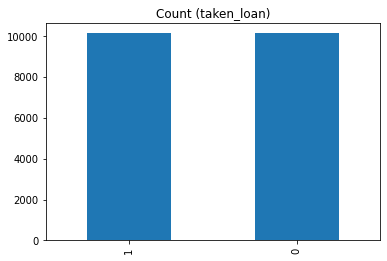

In [158]:
print('Random under-sampling:')
print(df_test_under.financial_stress_mapped.value_counts())

df_test_under.financial_stress_mapped.value_counts().plot(kind='bar', title='Count (taken_loan)')

In [159]:
df_test_under['financial_stress_mapped'].value_counts()

1    10154
0    10154
Name: financial_stress_mapped, dtype: int64

# Random Forest

In [228]:
X = df_test_under.drop('financial_stress_mapped',axis=1)
y = df_test_under['financial_stress_mapped']

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rfc = RandomForestClassifier(n_estimators = 200, max_features = 'auto', min_samples_split = 5)

In [213]:
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [214]:
rfc_pred = rfc.predict(X_test)

In [215]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      3025
           1       0.73      0.68      0.71      3068

    accuracy                           0.71      6093
   macro avg       0.71      0.71      0.71      6093
weighted avg       0.71      0.71      0.71      6093



In [216]:
from sklearn.metrics import confusion_matrix

In [217]:
confusion_matrix(y_test,rfc_pred)

array([[2247,  778],
       [ 974, 2094]])

In [218]:
from sklearn.metrics import roc_auc_score

In [219]:
roc_auc_score(y_test, rfc_pred)

0.7126696262135399

# Tensorflow

In [183]:
ann = tf.keras.models.Sequential()

In [184]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [185]:
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=25,activation="relu"))

In [186]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

ann.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['accuracy'])

In [187]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 50)

Epoch 1/50
445/445 [==============================] - 1s 1ms/step - loss: 661.3610 - accuracy: 0.4989
Epoch 2/50
445/445 [==============================] - 0s 969us/step - loss: 452.0555 - accuracy: 0.4999
Epoch 3/50
445/445 [==============================] - 0s 973us/step - loss: 365.7478 - accuracy: 0.5111
Epoch 4/50
445/445 [==============================] - 0s 983us/step - loss: 322.1410 - accuracy: 0.5116
Epoch 5/50
445/445 [==============================] - 0s 1ms/step - loss: 301.4111 - accuracy: 0.4916
Epoch 6/50
445/445 [==============================] - 0s 1ms/step - loss: 253.4984 - accuracy: 0.4998
Epoch 7/50
445/445 [==============================] - 0s 976us/step - loss: 214.7331 - accuracy: 0.5054
Epoch 8/50
445/445 [==============================] - 0s 981us/step - loss: 184.1266 - accuracy: 0.5037
Epoch 9/50
445/445 [==============================] - 0s 967us/step - loss: 162.4753 - accuracy: 0.5078
Epoch 10/50
445/445 [==============================] - 0s 988us/step -

In [188]:
ann.evaluate(X_train,y_train,verbose=0)

[0.83937668800354, 0.4994020462036133]

In [189]:
ann.evaluate(X_test,y_test,verbose=0)

[0.9264935851097107, 0.5035286545753479]

In [190]:
y_pred = ann.predict_classes(X_test,verbose=0)

/usr/local/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [192]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.503529
Precision: 0.503533
Recall: 0.998696
F1 score: 0.669507


In [193]:
roc_auc_score(y_test, y_pred)

0.5000092665423945

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.00      0.00      3025
           1       0.50      1.00      0.67      3068

    accuracy                           0.50      6093
   macro avg       0.50      0.50      0.34      6093
weighted avg       0.50      0.50      0.34      6093



# Dimensionality Reduction Technique

In [249]:
X = df_test_under.drop('financial_stress_mapped',axis=1)
y = df_test_under['financial_stress_mapped']

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=42)

In [251]:
from sklearn.decomposition import PCA

In [252]:
pca = PCA(n_components=6)

In [253]:
X_train = pca.fit_transform(X_train)

In [254]:
X_test = pca.transform(X_test)

# Random Forest on reduced dimensions

In [255]:
rfc.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200)

In [256]:
rfc_pred = rfc.predict(X_test)

In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      3025
           1       0.68      0.65      0.67      3068

    accuracy                           0.67      6093
   macro avg       0.67      0.67      0.67      6093
weighted avg       0.67      0.67      0.67      6093



In [258]:
pca.explained_variance_ratio_

array([9.75209974e-01, 2.07210247e-02, 4.06895472e-03, 2.02640420e-08,
       1.30298188e-08, 9.77207041e-09])

In [259]:
pca.explained_variance_

array([1.73064100e+10, 3.67722397e+08, 7.22090631e+07, 3.59612625e+02,
       2.31231625e+02, 1.73418506e+02])